In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import os
import glob
import cv2 # the opencv library
import matplotlib.pyplot as plt

In [2]:
image_path = 'C:/Users/hp/Desktop/images/test_image.jpg'
img = cv2.imread(image_path)

In [3]:
# inverted_image.shape

In [4]:
def display(image):
    dpi = 80
#     image = cv2.imread(im_path)
    if len(image.shape) == 3:
        height, width, depth = image.shape
    else:
        height, width = image.shape
    
    #declear the size of the image
    figsize = width/float(dpi), height/float(dpi)
    
    #create a figure of the right size of image
    fig = plt.figure(figsize = figsize)
    ax = fig.add_axes([0,0,1,1])
    
    # hides spines, ticks 
    ax.axis('off')
    
    #display the image
    ax.imshow(image, cmap = 'gray')
    plt.show()

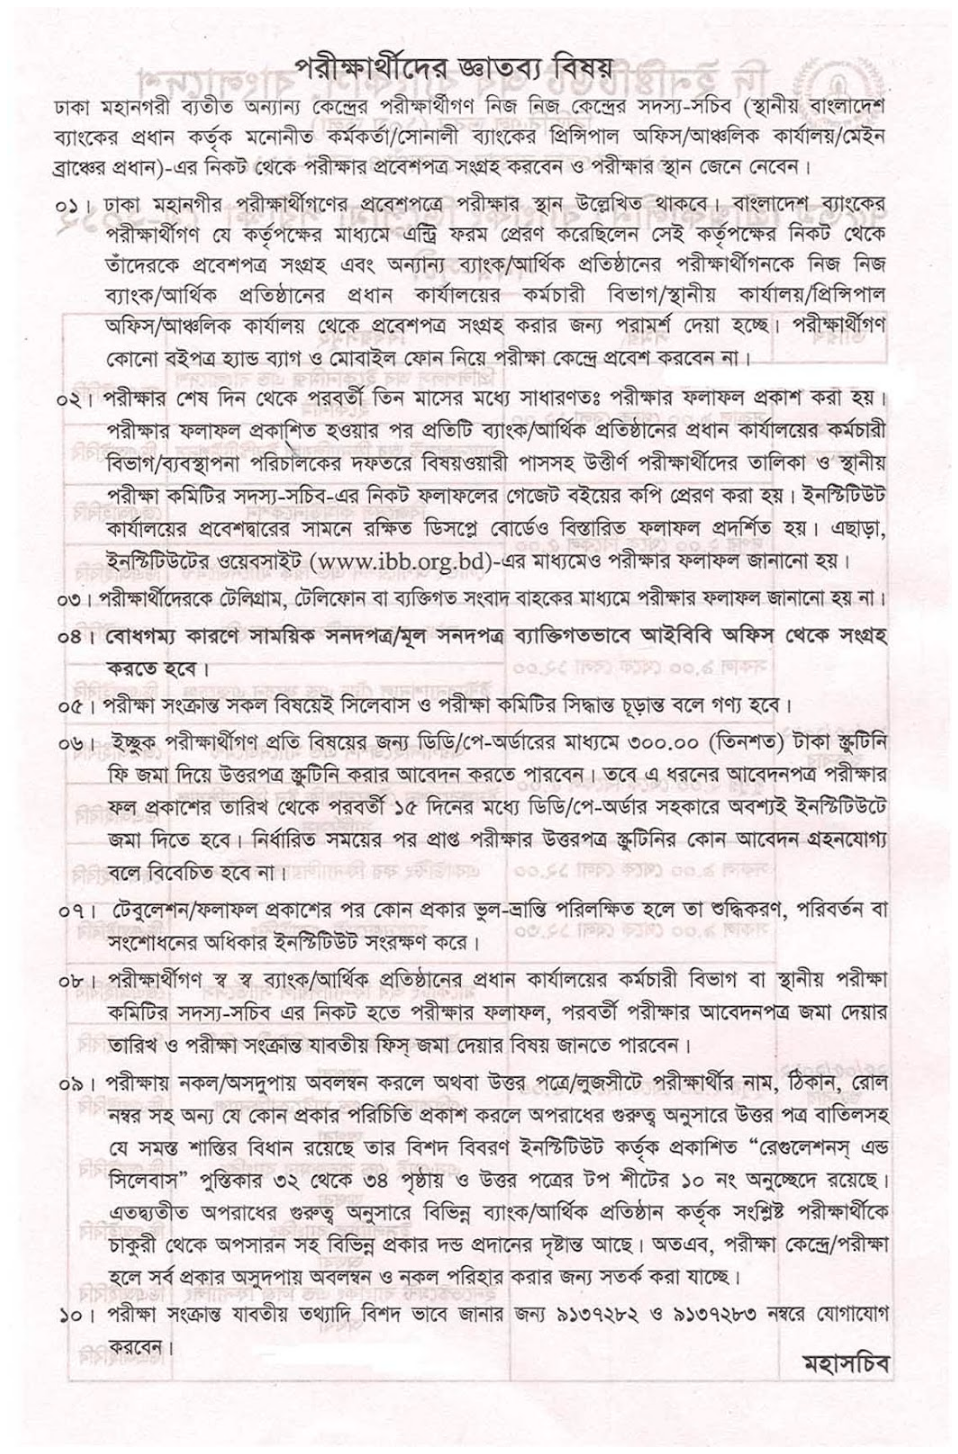

In [5]:
display(img)

## Inverted Images

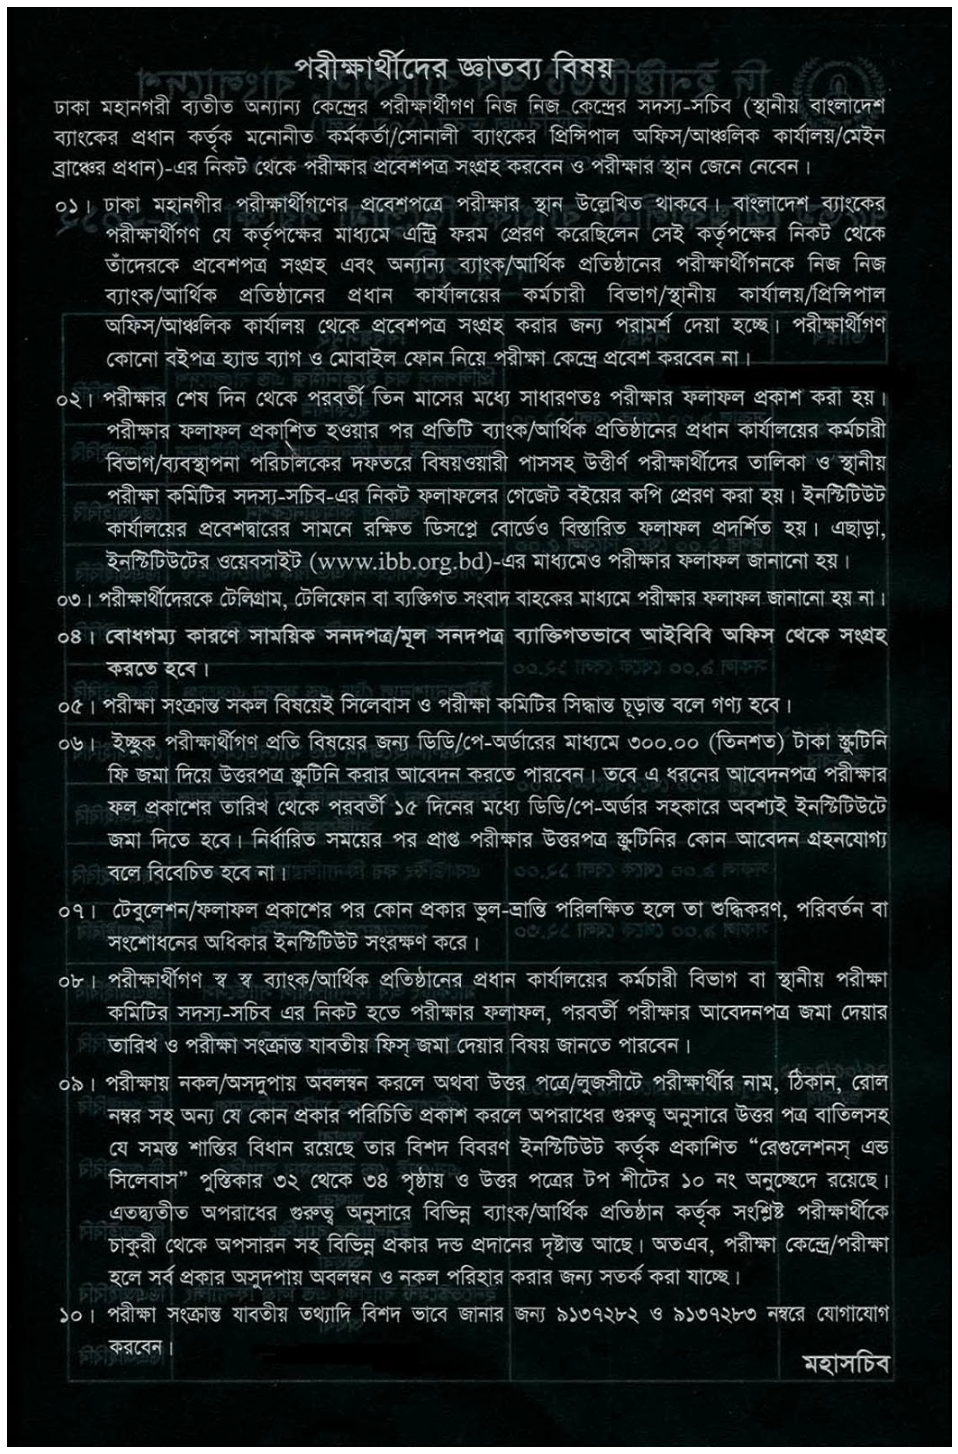

In [6]:
inverted_image = cv2.bitwise_not(img)
display(inverted_image)

## Rescaling 

## Binarization 

In [7]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

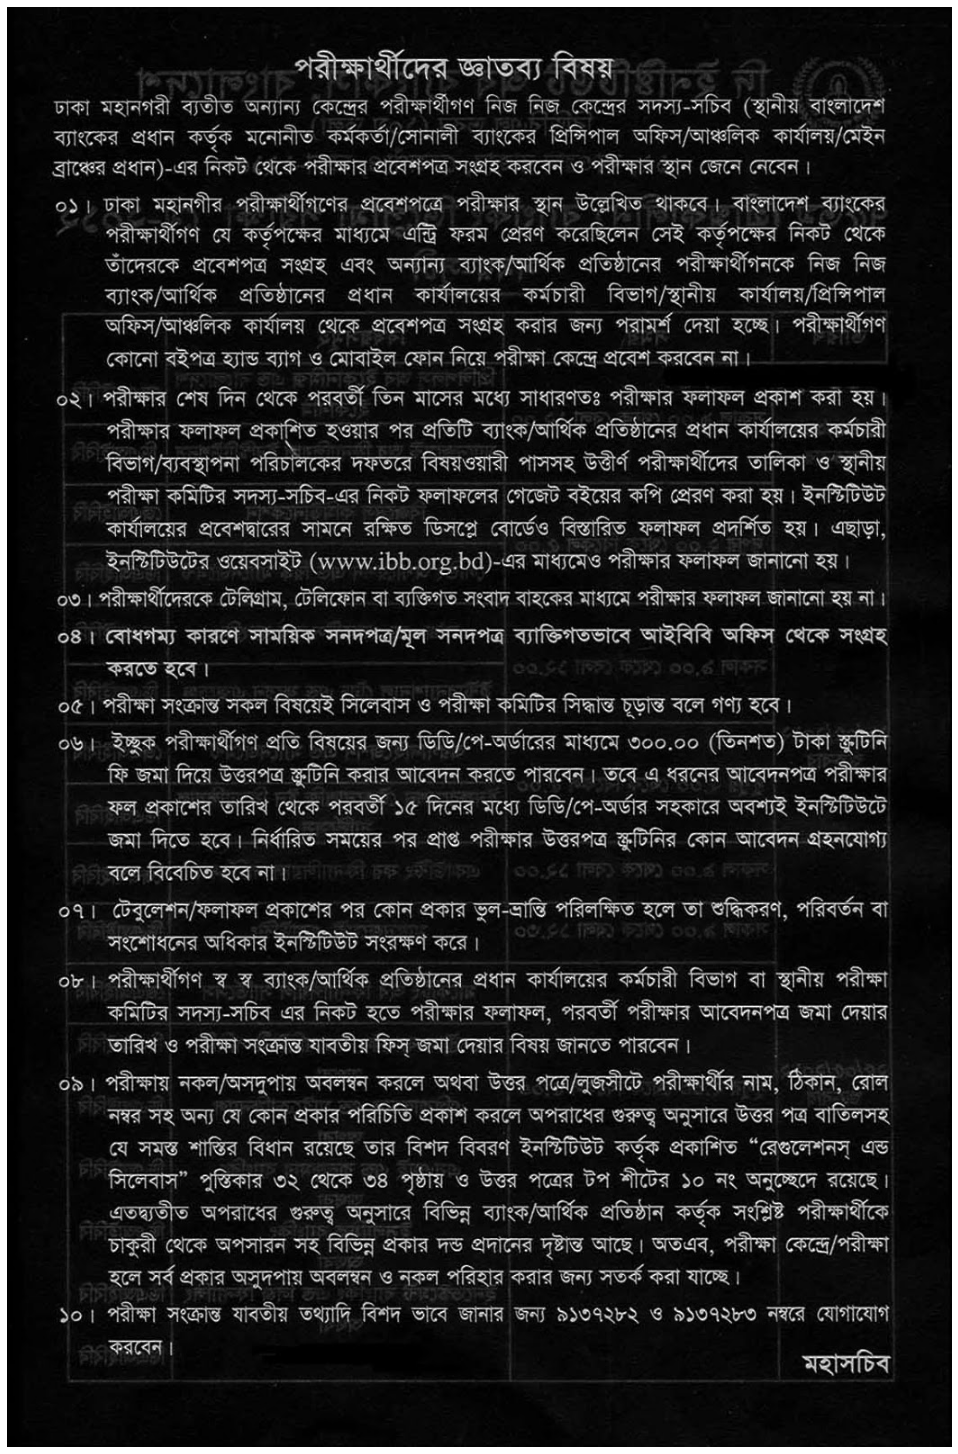

In [8]:
gray_image = grayscale(inverted_image)
display(gray_image)

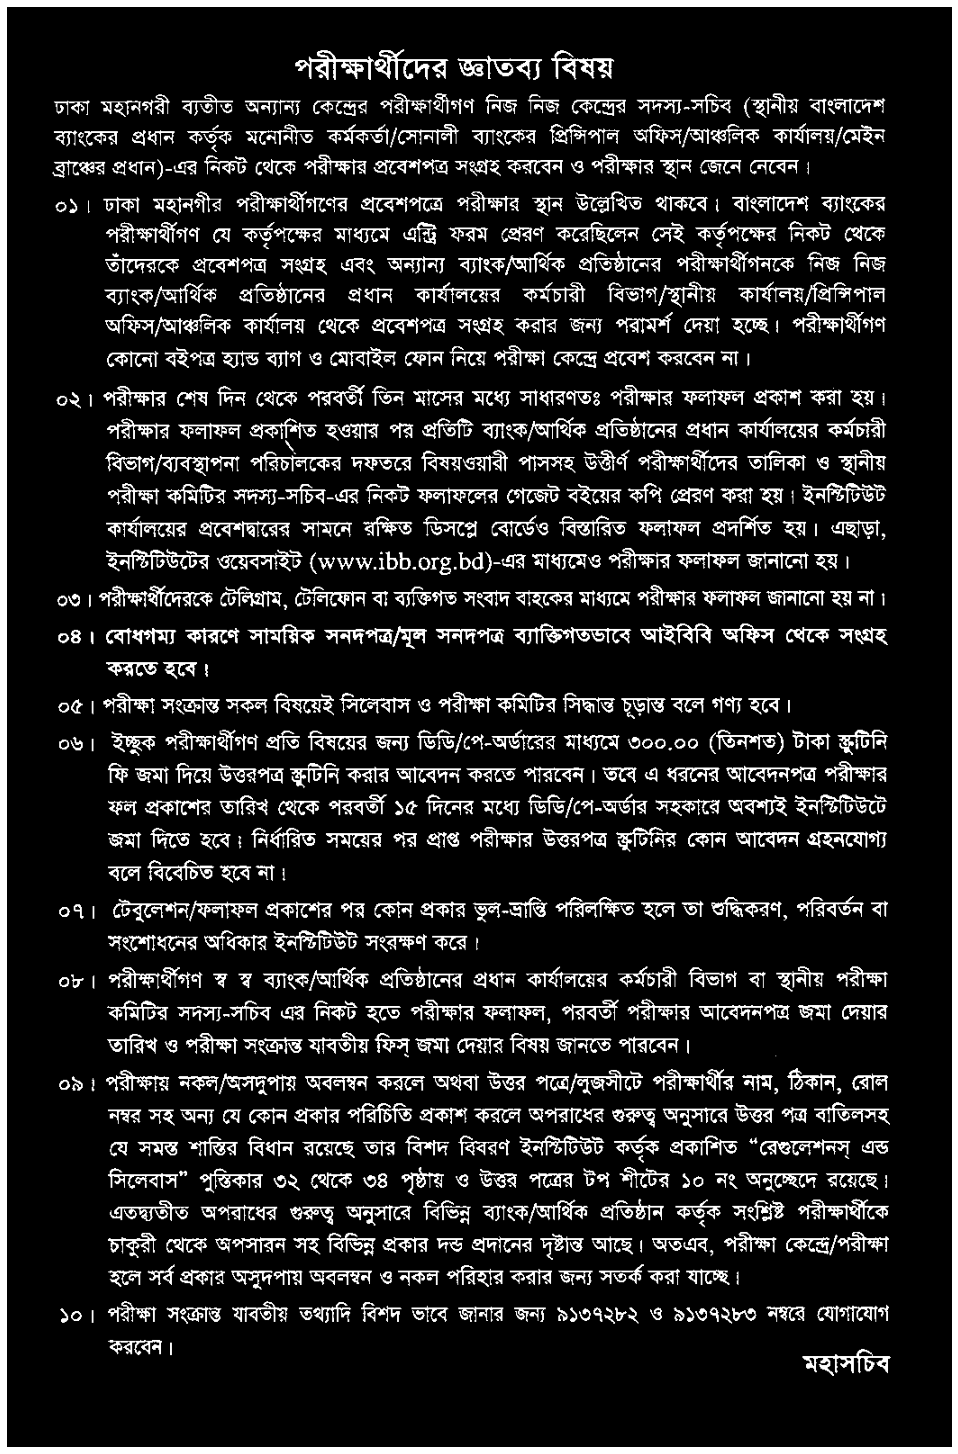

In [9]:
thresh, im_bw = cv2.threshold(gray_image,90,255, cv2.THRESH_BINARY)
display(im_bw)

## Noise Removal

In [10]:
def noise(image):
    kernel = np.ones((1,1),np.uint8)
    image = cv2.dilate(image, kernel, iterations = 1)
#     image = cv2.erode(image, kernel, iterations = 1)
#     image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
#     image = cv2.medianBlur(image, 3)
    return image

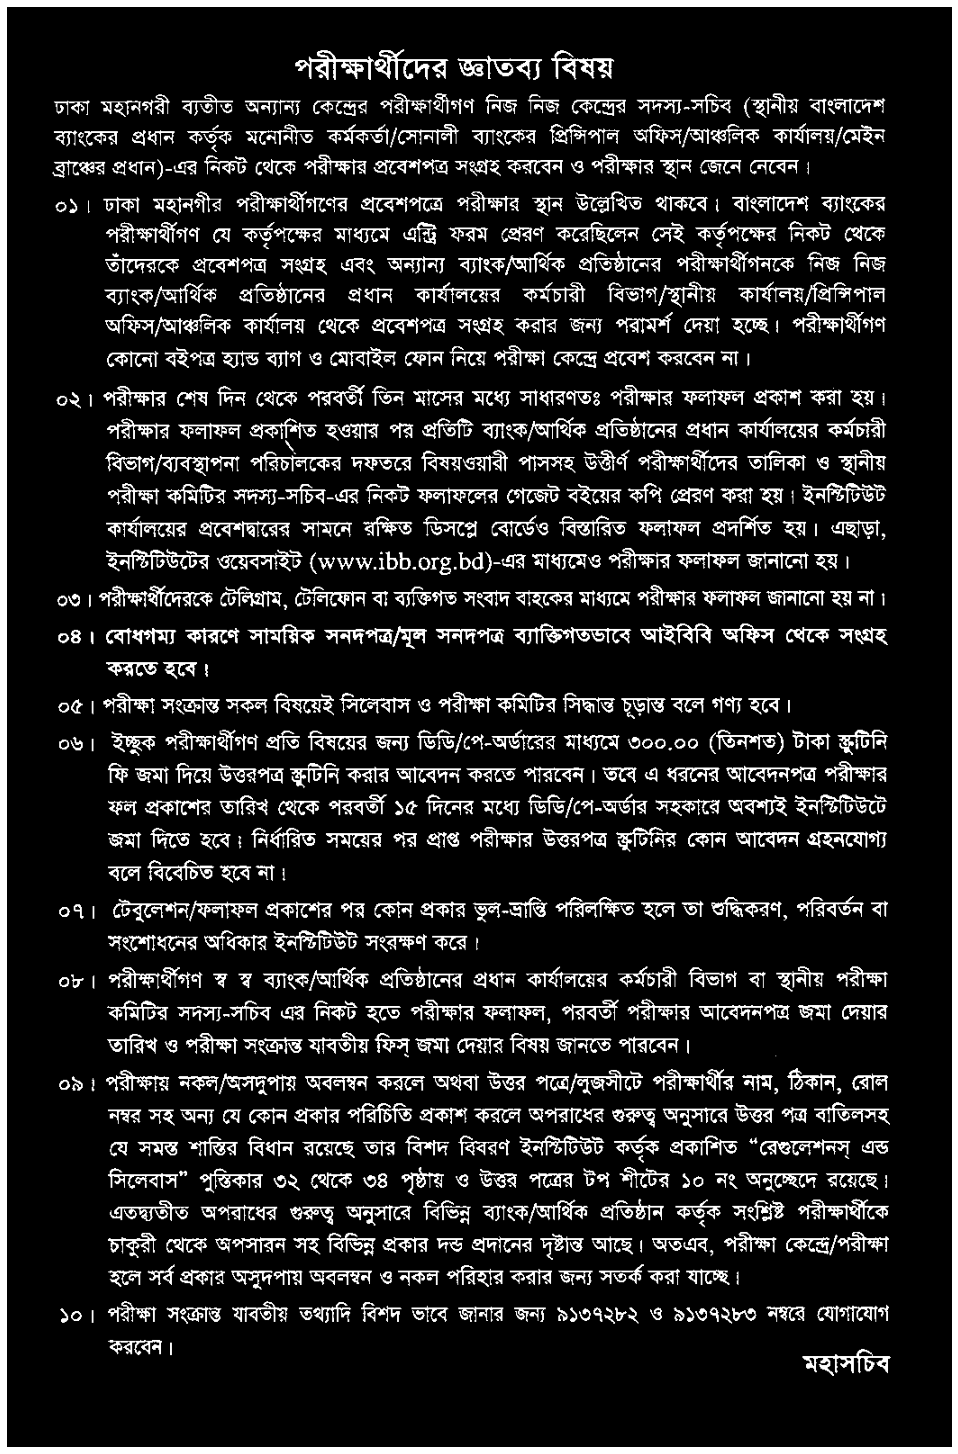

In [11]:
noise_img = noise(im_bw)
display(noise_img)

In [12]:
final_image = cv2.bitwise_not(noise_img)

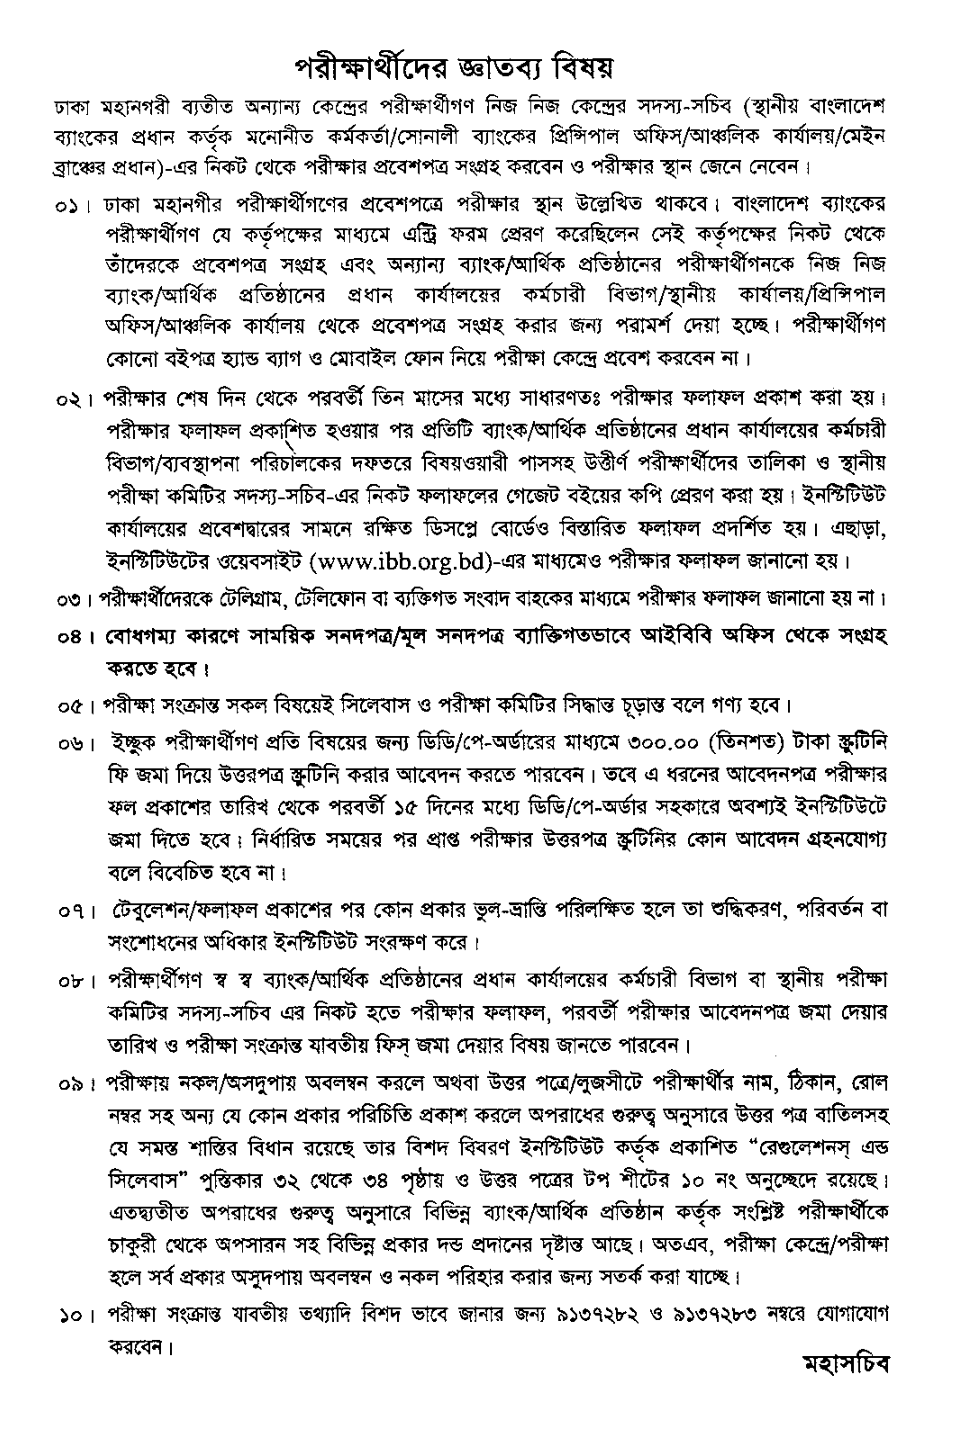

In [13]:
display(final_image) 

In [14]:
# filename = 'savedImage.jpg'
# cv2.imwrite(filename, final_image)

## Thining

In [15]:
"""
def thining(image):
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.erode(image, kernel, iterations = 1)
    image = cv2.bitwise_not(image)
    return image
"""

'\ndef thining(image):\n    image = cv2.bitwise_not(image)\n    kernel = np.ones((2,2),np.uint8)\n    image = cv2.erode(image, kernel, iterations = 1)\n    image = cv2.bitwise_not(image)\n    return image\n'

In [16]:
#thin_img = thining(im_bw)
#display(final_image)

## Thicknes

In [17]:
"""def thick_font(image):
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return image"""

'def thick_font(image):\n    image = cv2.bitwise_not(image)\n    kernel = np.ones((2,2),np.uint8)\n    image = cv2.dilate(image, kernel, iterations=1)\n    image = cv2.bitwise_not(image)\n    return image'

In [18]:
#thick_img = thick_font(noise_img)
# display(thick_img)

## Remove Skewness and Rotate (If Needed)

In [19]:

"""def getSkewAngle(cvImage) -> float:
    # Prep image, copy, convert to gray scale, blur, and threshold
    newImage = cvImage.copy()
    gray = cv2.cvtColor(newImage, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (9, 9), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Apply dilate to merge text into meaningful lines/paragraphs.
    # Use larger kernel on X axis to merge characters into single line, cancelling out any spaces.
    # But use smaller kernel on Y axis to separate between different blocks of text
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))
    dilate = cv2.dilate(thresh, kernel, iterations=2)

    # Find all contours
    contours, hierarchy = cv2.findContours(dilate, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)
    for c in contours:
        rect = cv2.boundingRect(c)
        x,y,w,h = rect
        cv2.rectangle(newImage,(x,y),(x+w,y+h),(0,255,0),2)

    # Find largest contour and surround in min area box
    largestContour = contours[0]
    print (len(contours))
    minAreaRect = cv2.minAreaRect(largestContour)
    cv2.imwrite("temp/boxes.jpg", newImage)
    # Determine the angle. Convert it to the value that was originally used to obtain skewed image
    angle = minAreaRect[-1]
    if angle < -45:
        angle = 90 + angle
    return -1.0 * angle
# Rotate the image around its center
def rotateImage(cvImage, angle: float):
    newImage = cvImage.copy()
    (h, w) = newImage.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    newImage = cv2.warpAffine(newImage, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return newImage

# Deskew image
def deskew(cvImage):
    angle = getSkewAngle(cvImage)
    return rotateImage(cvImage, 1.0 * angle)
    """

'def getSkewAngle(cvImage) -> float:\n    # Prep image, copy, convert to gray scale, blur, and threshold\n    newImage = cvImage.copy()\n    gray = cv2.cvtColor(newImage, cv2.COLOR_BGR2GRAY)\n    blur = cv2.GaussianBlur(gray, (9, 9), 0)\n    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]\n\n    # Apply dilate to merge text into meaningful lines/paragraphs.\n    # Use larger kernel on X axis to merge characters into single line, cancelling out any spaces.\n    # But use smaller kernel on Y axis to separate between different blocks of text\n    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))\n    dilate = cv2.dilate(thresh, kernel, iterations=2)\n\n    # Find all contours\n    contours, hierarchy = cv2.findContours(dilate, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)\n    contours = sorted(contours, key = cv2.contourArea, reverse = True)\n    for c in contours:\n        rect = cv2.boundingRect(c)\n        x,y,w,h = rect\n        cv2.rectangle(newI

In [20]:
#rotate_img = deskew(img)
# display(rotate_img)

## OCR

In [21]:
import pytesseract
from PIL import Image
from pytesseract import image_to_string

In [22]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'


In [23]:
ocr_result = pytesseract.image_to_string(final_image,lang="ben")   

In [24]:
print(ocr_result) 

ঢাকা মহানগরী ব্যতীত অন্যান্য কেন্দ্রের পরীক্ষার্থীগণ নিজ নিজ কেন্দ্রের সদস্য-সচিব (স্থানীয় বাংলাদেশ
ধকের প্রধান কর্তৃক মনোনীত কর্মকর্তা/সোনালী ব্যাংকের শ্রিসিপাল অফিস/আঞ্চলিক কার্যালয়/মেইন
ত্রাঞ্চের প্রধান)-এর নিকট থেকে পরীক্ষার প্রবেশপত্র সংগ্রহ করবেন ও পরীক্ষার স্থান জেনে নেবেন।

০১। ঢাকা মহানগীর পরীক্ষার্থীগণের প্রবেশপত্রে পরীক্ষার স্থান উল্লেখিত থাকবে । বাংলাদেশ ব্যাংকের
পরীক্ষার্থীগণ যে কর্তৃপক্ষের মাধ্যমে এন্ট্রি ফরম প্রেরণ করেছিলেন সেই কর্তৃপক্ষের নিকট থেকে
তাঁদেরকে প্রবেশপত্র সংগ্রহ এবং অন্যান্য ব্যাংক/আর্থিক প্রতিষ্ঠানের পরীক্ষার্থীগনকে নিজ নিজ
ব্যাংক/আর্থিক প্রতিষ্ঠানের প্রধান কার্যালয়ের কর্মচারী বিভাগ/স্থানীয় কার্ষালয়/প্রিন্সিপাল
অফিস/আঞ্চলিক কার্যালয় থেকে প্রবেশপত্র সংগ্রহ করার জন্য পরামর্শ দেয়া হচ্ছে! পরীক্ষার্থীগণ
কোনো বইপত্র হ্যান্ড ব্যাগ ও মোবাইল ফোন নিয়ে পরীক্ষা কেন্দ্রে প্রবেশ করবেন না।

০২। পরীক্ষার শেষ দিন থেকে পরবর্তী ভিন মাসের মধ্যে সাধারণতঃ পরীক্ষার ফলাফল প্রকাশ করা হয়।
পরীক্ষার ফলাফল প্রকাশ্রিত হওয়ার পর প্রতিটি ব্যাংক/র্থিক প্রতিষ্ঠানের প্রধান কার্যালয

## Translet to English

In [25]:
!pip install googletrans

In [26]:
from googletrans import Translator

translator = Translator()
try:
    result = translator.translate(ocr_result, src='bn', dest='en')
except:
    print('error')

# print(result.src)
# print(result.dest)
# print(result.text)

error


In [1]:
import pyttsx3
engine = pyttsx3.init()
text = "নকল পরিহার করার জন্য সতর্ক করা যাচ্ছে"
engine.say(text)
# play the speech
engine.runAndWait()

In [28]:
!pip install gtts

In [29]:
!pip install playsound==1.2.2

In [30]:
!pip install pydub
from pydub import AudioSegment


C:\Users\hp\anaconda3\envs\ILKMS\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [32]:
from gtts import gTTS
from playsound import playsound
import os
tts = gTTS(text=ocr_result, lang='bn', slow=False)
tts.save("good.mp3")

os.system("good.mp3")
playsound("good.mp3")
 

KeyboardInterrupt: 

In [ ]:
from gtts import gTTS
import os
mytext = "Hi, this is an example of converting text to audio. This is a bot speaking here, not a real human!"
audio = gTTS(text=mytext, lang="en", slow=True)
audio.save("example.mp3")
os.system("start example.mp3")

## save in docx

In [ ]:
!pip install python-docx 

In [ ]:
from docx import Document
from docx.shared import Inches

In [ ]:
def valid_xml_char_ordinal(c):
    codepoint = ord(c)
    # conditions ordered by presumed frequency
    return (
        0x20 <= codepoint <= 0xD7FF or
        codepoint in (0x9, 0xA, 0xD) or
        0xE000 <= codepoint <= 0xFFFD or
        0x10000 <= codepoint <= 0x10FFFF
        )
    
cleaned_string = ''.join(c for c in ocr_result if valid_xml_char_ordinal(c))

In [ ]:
document = Document()

document.add_heading('নথি | অফিস ব্যবস্থাপনা', 0)

p = document.add_paragraph(cleaned_string)
# document.add_heading(, level=1)
# document.add_page_break()

document.save('demo.docx')

## docx to pdf

In [ ]:
!pip install docx2pdf
# docx2pdf input.docx output.pdf

In [ ]:
from docx2pdf import convert

convert("demo.docx")
convert("demo.docx", "output.pdf")
# convert("my_docx_folder/")

## string to pdf

In [ ]:
!pip install fpdf

In [ ]:
from fpdf import FPDF

pdf=FPDF()
pdf.add_page()
pdf.set_font('Courier','B',16)

pdf.cell(40,10,'Hello World!')
pdf.output('demo.pdf','F')

### Sample test 